In [3]:
from autograd import numpy as np
from autograd import grad
import matplotlib.pyplot as plt

datapath = 'datasets/'
csvname = datapath + '2d_span_data_centered.csv'
# load in dataset
X = np.loadtxt(csvname,delimiter = ',')

figure = plt.figure(figsize = (4,4))
plt.scatter(X[0,:],X[1,:],s=60,c='k',edgecolor='w')
plt.show()

def square_cost(w):
    encoder = np.dot(w.T,X)
    decoder = np.dot(w,encoder)
    cost = np.sum(np.square(decoder - X))
    return cost / float(X.shape[1])

def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)
        # take gradient descent step
        w = w - alpha*grad_eval
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

weights = np.array([[-1],[-1]])

alpha = 0.01
max_its = 1000
weight_his,cost_his = gradient_descent(square_cost,alpha,max_its,weights)
final_c = weight_his[-1]
encoder = np.dot(final_c.T,X)


<Figure size 400x400 with 1 Axes>

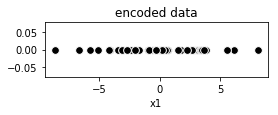

In [4]:
figure = plt.figure(figsize = (4,1))
plt.scatter(encoder[0],[0 for i in range(50)],s=60,c='k',edgecolor='w')
plt.title('encoded data')
plt.xlabel('x1')
plt.show()

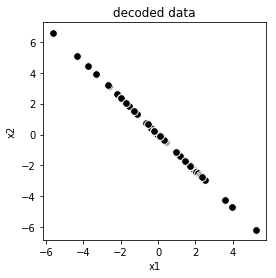

In [5]:
decoder = np.dot(final_c,encoder)
figure = plt.figure(figsize = (4,4))
plt.scatter(decoder[0],decoder[1],s=60,c='black',edgecolor='w')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('decoded data')
plt.show()

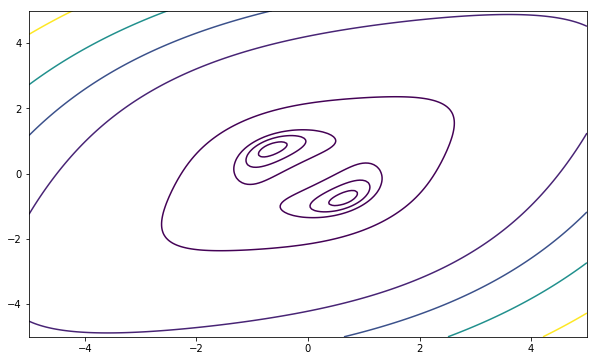

In [20]:
from mpl_toolkits.mplot3d import Axes3D
def fun(C):
    return np.sum((np.dot(np.dot(C,C.T),X) - X)**2)/float(len(X[0]))


c_0 = np.linspace(-5,5,200)
c_1 = np.linspace(-5,5,200)
c0,c1 = np.meshgrid(c_0,c_1)

result = np.zeros(shape=(c0.shape[0],c0.shape[1]))
for i in range(c0.shape[0]):
    for j in range(c0.shape[1]):
        c = np.array([[c0[i][j]], [c1[i][j]]])
        result[i][j] = fun(c)

plt.figure(figsize = (10,6))
plt.contour(c0,c1,result,[1,2,5,10,100,2000,5000,10000,20000])
plt.show()



# From the pic we can see there are two global minimaa